In [243]:
%precision 2

'%.2f'

In [244]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [245]:
import numpy as np
import pandas as pd

import os

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='darkgrid')

In [246]:
! ls ../output_data/

nse_500_company_info.csv


### Read companies info data

In [215]:
input_data_folder = '../output_data/'

In [247]:
nse_500_info = pd.read_csv(os.path.join(input_data_folder, 'nse_500_company_info.csv'))
nse_500_info.head()
nse_500_info.shape

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
0,3MINDIA,22361.0,19841.00,1650.00,72.54,0.00,29.16,19.02,9.49,10
1,ACC,26949.0,1435.00,584.47,15.62,0.98,15.86,15.14,8.13,10
2,AIAENG,15810.0,1677.00,336.80,40.26,0.54,17.45,12.34,15.96,2
3,APLAPOLLO,3189.0,1315.00,415.57,26.59,1.05,16.31,13.15,25.78,10
4,AUBANK,19159.0,652.95,68.15,38.68,0.11,8.97,14.70,41.16,10


(501, 10)

In [248]:
nse_500_info.isna().sum()

symbol                0
market_cap            0
current_price         0
book_value            1
stock_pe             42
dividend_yield        1
roce                  1
roe                   0
sales_growth_3yrs    12
face_value            0
dtype: int64

In [249]:
nse_500_info.sample(5)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
427,SUPRAJIT,2536.0,181.30,50.12,22.30,0.86,22.92,17.57,22.50,1
241,INFY,337080.0,789.55,127.86,22.89,2.78,31.30,23.09,10.64,5
499,ZYDUSWELL,8947.0,1552.00,576.65,172.58,0.32,4.02,4.09,8.43,10
323,NATCOPHARM,10145.0,558.15,196.04,16.20,1.12,23.54,19.63,23.32,2
57,BAYERCROP,11445.0,3333.00,548.56,68.88,0.54,20.64,13.03,-1.01,10


### Missing stock_p/e
-  Companies that are losing money do not have a P/E ratio

In [251]:
row_ind = nse_500_info['stock_pe'].isna() == True
nse_500_info[row_ind]

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
8,ADANIGREEN,10643.00,68.05,13.80,NaN,0.00,5.72,-2.45,NaN,10
10,ADANIPOWER,22872.00,59.30,44.41,NaN,0.00,5.11,-2.40,-42.63,10
12,ABCAPITAL,17290.00,78.50,33.12,NaN,0.00,1.29,0.27,190.00,10
20,ALBK,9900.00,26.60,24.53,NaN,0.00,0.92,-85.92,-3.70,10
25,ANDHRABANK,4924.00,16.50,44.11,NaN,0.00,4.08,-23.24,2.39,10
40,BASF,4268.00,985.85,326.38,NaN,0.51,1.33,-2.45,8.26,10
54,BANKINDIA,19498.00,59.50,127.20,NaN,0.00,2.98,-15.48,-0.83,10
55,MAHABANK,6407.00,11.00,9.85,NaN,0.00,1.28,-61.01,-5.98,10
64,BHARTIARTL,175282.00,341.55,191.66,NaN,0.57,0.01,-4.42,-6.30,5
72,BBTC,7533.00,1080.00,36.84,NaN,0.09,2.08,-7.69,0.14,2


### Drop missing values?

In [218]:
# companies_info = nse_500_info.dropna(how='any').reset_index(drop=True)

In [252]:
# companies_info.shape
# companies_info.isna().sum()

In [220]:
# companies_info.head(5)

,company,market_cap,current_price,book_value,stock_p/e,dividend_yield,roce,roe,sales_growth_(3yrs),face_value
0,ACC,"26,949cr.","1,435",585.33,15.46,0.98%,16.06%,15.28%,8.13%,10.0
1,AIAENG,"15,810cr.","1,677",372.61,32.97,0.54%,19.57%,14.70%,13.54%,2.0
2,APLAPOLLO,"3,189cr.","1,315",397.54,20.84,1.05%,19.81%,16.45%,19.86%,10.0
3,ADANIPORTS,"81,854cr.",395.25,118.49,18.45,0.05%,14.72%,17.52%,15.40%,2.0
4,ADANIPOWER,"22,872cr.",59.30,20.00,51.99,0.00%,9.38%,-318%,-2.00%,10.0


### Merge Industry column in data

In [256]:
nse_500_companies = pd.read_csv('../data/ind_nifty500list.csv')
nse_500_companies.columns = [c.lower().replace(' ', '_') for c in nse_500_companies.columns]
nse_500_companies.head()

,company_name,industry,symbol,series,isin_code
0,3M India Ltd.,SERVICES,3MINDIA,EQ,INE470A01017
1,ACC Ltd.,CEMENT & CEMENT PRODUCTS,ACC,EQ,INE012A01025
2,AIA Engineering Ltd.,INDUSTRIAL MANUFACTURING,AIAENG,EQ,INE212H01026
3,APL Apollo Tubes Ltd.,METALS,APLAPOLLO,EQ,INE702C01019
4,AU Small Finance Bank Ltd.,FINANCIAL SERVICES,AUBANK,EQ,INE949L01017


In [257]:
nse_500_info.head()

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value
0,3MINDIA,22361.0,19841.00,1650.00,72.54,0.00,29.16,19.02,9.49,10
1,ACC,26949.0,1435.00,584.47,15.62,0.98,15.86,15.14,8.13,10
2,AIAENG,15810.0,1677.00,336.80,40.26,0.54,17.45,12.34,15.96,2
3,APLAPOLLO,3189.0,1315.00,415.57,26.59,1.05,16.31,13.15,25.78,10
4,AUBANK,19159.0,652.95,68.15,38.68,0.11,8.97,14.70,41.16,10


In [260]:
companies_info_industry = pd.merge(left=nse_500_info, right=nse_500_companies, 
                                    on='symbol',
                                   how='left'
                                  )
companies_info_industry.shape
companies_info_industry.head()

(501, 14)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,company_name,industry,series,isin_code
0,3MINDIA,22361.0,19841.00,1650.00,72.54,0.00,29.16,19.02,9.49,10,3M India Ltd.,SERVICES,EQ,INE470A01017
1,ACC,26949.0,1435.00,584.47,15.62,0.98,15.86,15.14,8.13,10,ACC Ltd.,CEMENT & CEMENT PRODUCTS,EQ,INE012A01025
2,AIAENG,15810.0,1677.00,336.80,40.26,0.54,17.45,12.34,15.96,2,AIA Engineering Ltd.,INDUSTRIAL MANUFACTURING,EQ,INE212H01026
3,APLAPOLLO,3189.0,1315.00,415.57,26.59,1.05,16.31,13.15,25.78,10,APL Apollo Tubes Ltd.,METALS,EQ,INE702C01019
4,AUBANK,19159.0,652.95,68.15,38.68,0.11,8.97,14.70,41.16,10,AU Small Finance Bank Ltd.,FINANCIAL SERVICES,EQ,INE949L01017


In [261]:
drop_cols = ['company_name', 'series', 'isin_code']

companies_info_industry.drop(labels=drop_cols, axis=1, inplace=True)

In [262]:
companies_info_industry.head()
companies_info_industry.shape

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry
0,3MINDIA,22361.0,19841.00,1650.00,72.54,0.00,29.16,19.02,9.49,10,SERVICES
1,ACC,26949.0,1435.00,584.47,15.62,0.98,15.86,15.14,8.13,10,CEMENT & CEMENT PRODUCTS
2,AIAENG,15810.0,1677.00,336.80,40.26,0.54,17.45,12.34,15.96,2,INDUSTRIAL MANUFACTURING
3,APLAPOLLO,3189.0,1315.00,415.57,26.59,1.05,16.31,13.15,25.78,10,METALS
4,AUBANK,19159.0,652.95,68.15,38.68,0.11,8.97,14.70,41.16,10,FINANCIAL SERVICES


(501, 11)

### No. of companies across industries

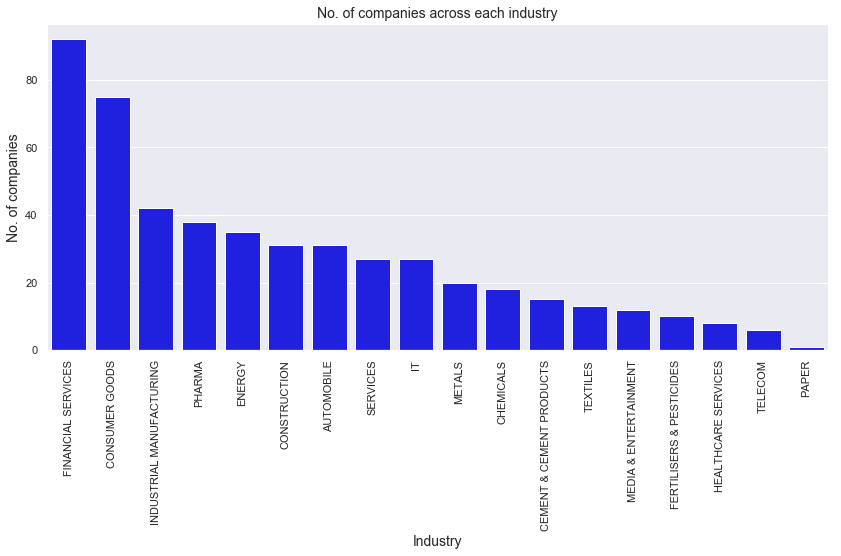

In [282]:
num_companies_industry = companies_info_industry.industry.value_counts()
# num_companies_industry

plt.figure(figsize=(14, 6))
sns.barplot(x=num_companies_industry.index, 
            y=num_companies_industry.values, color='blue')
plt.title('No. of companies across each industry', fontsize=14)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('No. of companies', fontsize=14)
plt.xticks(rotation=90)
plt.show();

### Market Cap: top companies

In [286]:
companies_info_industry.sort_values(by=['market_cap'], ascending=False).head(10)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry
388,RELIANCE,830488.94,1310.00,639.40,23.47,0.50,11.45,9.78,16.89,10,ENERGY
443,TCS,768376.00,2048.00,210.26,24.28,1.46,52.62,38.77,12.78,1,IT
188,HDFCBANK,649325.00,1187.00,272.73,29.45,0.63,7.51,16.50,18.01,1,FINANCIAL SERVICES
204,HINDUNILVR,419984.00,1940.00,35.38,65.88,1.13,119.00,84.04,7.16,1,CONSUMER GOODS
208,HDFC,340038.00,1969.00,448.00,31.94,1.06,9.90,13.51,11.94,2,FINANCIAL SERVICES
241,INFY,337080.00,789.55,127.86,22.89,2.78,31.30,23.09,10.64,5,IT
222,ITC,309497.00,251.90,47.17,24.14,2.28,34.00,22.91,7.13,1,CONSUMER GOODS
282,KOTAKBANK,297134.00,1556.00,224.60,57.13,0.05,7.21,12.07,13.48,5,FINANCIAL SERVICES
209,ICICIBANK,268787.00,416.10,167.75,49.86,0.24,4.52,3.15,6.33,2,FINANCIAL SERVICES
46,BAJFINANCE,226211.00,3901.00,299.48,54.10,0.15,13.02,21.98,33.55,2,FINANCIAL SERVICES


### Dividend yield 

#### Top dividend paying companies

In [284]:
companies_info_industry.sort_values(by=['dividend_yield'], ascending=False).head(10)

,symbol,market_cap,current_price,book_value,stock_pe,dividend_yield,roce,roe,sales_growth_3yrs,face_value,industry
108,COX&KINGS,56.5,3.20,173.18,0.38,31.25,8.55,6.00,76.06,5,SERVICES
172,GRAPHITE,5348.0,273.70,238.13,2.45,20.09,112.00,78.30,71.03,2,INDUSTRIAL MANUFACTURING
227,IBULHSGFIN,10016.0,234.25,403.65,3.00,17.07,12.18,22.73,20.35,2,FINANCIAL SERVICES
485,VEDL,53026.0,142.65,209.51,11.84,13.22,6.97,6.04,4.26,1,METALS
333,NATIONALUM,8311.0,44.55,56.20,7.01,12.91,25.99,16.51,19.04,5,METALS
370,PGHL,7265.0,4376.00,448.07,8.52,10.05,78.16,73.25,-3.32,10,PHARMA
205,HINDZINC,86809.0,205.45,79.53,11.13,9.73,28.32,22.10,14.20,2,METALS
395,SJVN,9412.0,23.95,28.60,6.14,8.98,15.96,12.84,2.12,10,ENERGY
375,RECLTD,24252.0,122.80,173.69,4.18,8.96,9.21,17.31,2.15,10,FINANCIAL SERVICES
185,HEG,3543.0,918.05,963.58,1.41,8.72,143.00,109.00,96.44,10,INDUSTRIAL MANUFACTURING


#### Across industries

In [285]:
companies_info_industry.groupby(by='industry').agg({'dividend_yield': ['mean', 'median']
                                                   })

dividend_yield       
                                   mean median
industry                                      
AUTOMOBILE                     1.230333  0.965
CEMENT & CEMENT PRODUCTS       0.768000  0.810
CHEMICALS                      1.203333  0.665
CONSTRUCTION                   1.250323  0.550
CONSUMER GOODS                 0.692667  0.440
ENERGY                         2.819714  2.010
FERTILISERS & PESTICIDES       2.055000  1.565
FINANCIAL SERVICES             1.257935  0.545
HEALTHCARE SERVICES            0.796250  0.430
INDUSTRIAL MANUFACTURING       2.017857  1.060
IT                             1.593704  1.370
MEDIA & ENTERTAINMENT          1.632500  0.425
METALS                         3.695500  2.045
PAPER                          3.040000  3.040
PHARMA                         0.964737  0.740
SERVICES                       2.280741  0.500
TELECOM                        1.618333  0.570
TEXTILES                       1.317692  0.550

In [202]:
companies_info_industry.query('Industry=="IT"')

,company,market_cap,current_price,book_value,stock_p/e,dividend_yield,roce,roe,sales_growth_(3yrs),face_value,Industry
49,BSOFT,1704.0,61.650002,61.980000,7.080000,3.22,17.299999,15.440000,-7.510000,2.0,IT
81,CYIENT,4950.0,450.100006,233.160004,10.110000,3.35,23.600000,19.610001,14.280000,5.0,IT
112,FSL,3178.0,45.849998,39.250000,8.360000,4.35,15.200000,14.780000,5.950000,10.0,IT
142,HCLTECH,145732.0,1074.000000,304.970001,14.690000,0.74,30.670000,25.760000,24.740000,2.0,IT
149,HEXAWARE,10855.0,363.850006,85.129997,18.120001,2.33,33.160000,26.530001,14.170000,2.0,IT
178,INFIBEAM,2640.0,39.799999,41.709999,30.120001,0.00,4.060000,3.240000,50.959999,1.0,IT
179,NAUKRI,28557.0,2335.000000,207.869995,349.149994,0.26,3.940000,3.570000,15.470000,10.0,IT
180,INFY,337080.0,789.549988,132.289993,21.690001,2.78,32.099998,23.500000,9.810000,5.0,IT
182,INTELLECT,2362.0,178.649994,77.129997,27.480000,0.00,10.100000,10.440000,21.379999,5.0,IT
201,JUSTDIAL,3903.0,601.849976,154.020004,25.030001,0.00,21.930000,15.770000,10.120000,10.0,IT
